In [8]:
%%html
<style>
div.optional {
    display: block;
    background-color: #d7e2ff;
    border-color: #d7e2ff;
    border-left: 5px solid #d7e2ff;
    padding: 0.5em;
}
div.advanced {
    display: block;
    background-color: #fff4d7;
    border-color: #fff4d7;
    border-left: 5px solid #fff4d7;
    padding: 0.5em;
}
</style>

In [9]:
from platform import python_version

print(python_version())

3.7.10


In [10]:
import matplotlib
print(matplotlib.get_backend())

module://ipympl.backend_nbagg


In [11]:
!pip install ipympl

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [16]:
%matplotlib inline
import numpy as np
import scipy.linalg as sl
# we'll start using sparse matrices here
import scipy.sparse as sp
# and linear algebra functions designed for sparse matrices
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt
from pprint import pprint
# the following allows us to plot triangles indicating convergence order
#from mpltools import annotation
# Sympy for symbols rendering
import sympy as sy

import os


from IPython.display import display
from ipywidgets import widgets as ipywidgets
from matplotlib import cm
from matplotlib import widgets as mpl_widgets

# font sizes for plots
#plt.rcParams['font.size'] = 12
#plt.rcParams['font.family'] = 'sans-serif'
#plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']

# Modelling and Numerical Methods  <a class="tocSkip">
    
## Part 1  <a class="tocSkip">

## Continuum mechanics and vector/tensor calculus <a class="tocSkip">


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Differentiation-(or-taking-a-derivative)---the-continuous-definition" data-toc-modified-id="Differentiation-(or-taking-a-derivative)---the-continuous-definition-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Differentiation (or taking a derivative) - the continuous definition</a></span></li><li><span><a href="#Finite-differences" data-toc-modified-id="Finite-differences-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Finite differences</a></span><ul class="toc-item"><li><span><a href="#The-forward-difference" data-toc-modified-id="The-forward-difference-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>The forward difference</a></span></li><li><span><a href="#Taylor-series-to-estimate-accuracy" data-toc-modified-id="Taylor-series-to-estimate-accuracy-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Taylor series to estimate accuracy</a></span><ul class="toc-item"><li><span><a href="#Taylor-series-example-[from-previous-lecture]" data-toc-modified-id="Taylor-series-example-[from-previous-lecture]-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Taylor series example [from previous lecture]</a></span></li><li><span><a href="#Order-of-convergence---higher-generally-better" data-toc-modified-id="Order-of-convergence---higher-generally-better-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Order of convergence - higher generally better</a></span></li></ul></li><li><span><a href="#The-backward-difference" data-toc-modified-id="The-backward-difference-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>The backward difference</a></span></li><li><span><a href="#The-central-difference" data-toc-modified-id="The-central-difference-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>The central difference</a></span></li><li><span><a href="#Example:-Write-a-function-to-perform-numerical-differentiation" data-toc-modified-id="Example:-Write-a-function-to-perform-numerical-differentiation-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Example: Write a function to perform numerical differentiation</a></span></li><li><span><a href="#Example:-Compute-the-derivative-of-$\sin(x)$" data-toc-modified-id="Example:-Compute-the-derivative-of-$\sin(x)$-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Example: Compute the derivative of $\sin(x)$</a></span></li><li><span><a href="#How-small-(or-large)-can-$\Delta-x$-go?" data-toc-modified-id="How-small-(or-large)-can-$\Delta-x$-go?-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>How small (or large) can $\Delta x$ go?</a></span><ul class="toc-item"><li><span><a href="#Observations" data-toc-modified-id="Observations-2.7.1"><span class="toc-item-num">2.7.1&nbsp;&nbsp;</span>Observations</a></span></li></ul></li><li><span><a href="#Approximating-second-derivatives" data-toc-modified-id="Approximating-second-derivatives-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Approximating second derivatives</a></span></li></ul></li><li><span><a href="#Introduction-to-BVPs" data-toc-modified-id="Introduction-to-BVPs-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Introduction to BVPs</a></span><ul class="toc-item"><li><span><a href="#Problem-non-dimensionalisation" data-toc-modified-id="Problem-non-dimensionalisation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Problem non-dimensionalisation</a></span></li><li><span><a href="#Model-problem---BVP:-steady-state-advection-diffusion" data-toc-modified-id="Model-problem---BVP:-steady-state-advection-diffusion-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Model problem - BVP: steady-state advection-diffusion</a></span><ul class="toc-item"><li><span><a href="#Observations" data-toc-modified-id="Observations-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Observations</a></span></li></ul></li><li><span><a href="#Methods-for-solving-BVPs" data-toc-modified-id="Methods-for-solving-BVPs-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Methods for solving BVPs</a></span></li><li><span><a href="#Defining-a-grid-(or-mesh)" data-toc-modified-id="Defining-a-grid-(or-mesh)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Defining a grid (or mesh)</a></span></li><li><span><a href="#Dealing-with-Dirichlet-boundary-conditions" data-toc-modified-id="Dealing-with-Dirichlet-boundary-conditions-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Dealing with Dirichlet boundary conditions</a></span></li><li><span><a href="#Solving-the-diffusion-equation" data-toc-modified-id="Solving-the-diffusion-equation-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Solving the diffusion equation</a></span><ul class="toc-item"><li><span><a href="#Observations" data-toc-modified-id="Observations-3.6.1"><span class="toc-item-num">3.6.1&nbsp;&nbsp;</span>Observations</a></span></li></ul></li></ul></li><li><span><a href="#The-time-independent-(steady)-advection-diffusion-problem" data-toc-modified-id="The-time-independent-(steady)-advection-diffusion-problem-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>The time-independent (steady) advection-diffusion problem</a></span><ul class="toc-item"><li><span><a href="#Discretisation-choices-for-advection-and-diffusion" data-toc-modified-id="Discretisation-choices-for-advection-and-diffusion-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Discretisation choices for advection and diffusion</a></span><ul class="toc-item"><li><span><a href="#Observations" data-toc-modified-id="Observations-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Observations</a></span></li><li><span><a href="#More-observations" data-toc-modified-id="More-observations-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>More observations</a></span></li></ul></li><li><span><a href="#Upwind-for-advection" data-toc-modified-id="Upwind-for-advection-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Upwind for advection</a></span><ul class="toc-item"><li><span><a href="#Observations" data-toc-modified-id="Observations-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Observations</a></span></li></ul></li><li><span><a href="#Analysis-of-the-upwind-scheme-[$\star$]" data-toc-modified-id="Analysis-of-the-upwind-scheme-[$\star$]-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Analysis of the upwind scheme [$\star$]</a></span></li><li><span><a href="#Practicalities!" data-toc-modified-id="Practicalities!-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Practicalities!</a></span></li></ul></li><li><span><a href="#The-time-dependent-(unsteady)-advection-diffusion-problem" data-toc-modified-id="The-time-dependent-(unsteady)-advection-diffusion-problem-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>The time-dependent (unsteady) advection-diffusion problem</a></span><ul class="toc-item"><li><span><a href="#The-equation-in-higher-spatial-dimensions-[$\star$]" data-toc-modified-id="The-equation-in-higher-spatial-dimensions-[$\star$]-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>The equation in higher spatial dimensions [$\star$]</a></span></li><li><span><a href="#Non-dimensionalisation" data-toc-modified-id="Non-dimensionalisation-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Non-dimensionalisation</a></span></li><li><span><a href="#The-Method-of-Lines" data-toc-modified-id="The-Method-of-Lines-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>The Method of Lines</a></span><ul class="toc-item"><li><span><a href="#Defining-a-spatial-grid" data-toc-modified-id="Defining-a-spatial-grid-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Defining a spatial grid</a></span></li></ul></li><li><span><a href="#Discretising-in-space" data-toc-modified-id="Discretising-in-space-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Discretising in space</a></span><ul class="toc-item"><li><span><a href="#Including-Dirichlet-boundary-conditions" data-toc-modified-id="Including-Dirichlet-boundary-conditions-5.4.1"><span class="toc-item-num">5.4.1&nbsp;&nbsp;</span>Including Dirichlet boundary conditions</a></span></li><li><span><a href="#The-initial-condition" data-toc-modified-id="The-initial-condition-5.4.2"><span class="toc-item-num">5.4.2&nbsp;&nbsp;</span>The initial condition</a></span></li><li><span><a href="#The-(semi-)-discretised-system" data-toc-modified-id="The-(semi-)-discretised-system-5.4.3"><span class="toc-item-num">5.4.3&nbsp;&nbsp;</span>The (semi-) discretised system</a></span></li></ul></li><li><span><a href="#The-semi-disrete-matrix-system" data-toc-modified-id="The-semi-disrete-matrix-system-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>The semi-disrete matrix system</a></span></li><li><span><a href="#Discretising-in-time" data-toc-modified-id="Discretising-in-time-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Discretising in time</a></span><ul class="toc-item"><li><span><a href="#Forward-Euler" data-toc-modified-id="Forward-Euler-5.6.1"><span class="toc-item-num">5.6.1&nbsp;&nbsp;</span>Forward Euler</a></span></li><li><span><a href="#Observations" data-toc-modified-id="Observations-5.6.2"><span class="toc-item-num">5.6.2&nbsp;&nbsp;</span>Observations</a></span></li></ul></li><li><span><a href="#Example---advection-diffusion-of-a-Gaussian" data-toc-modified-id="Example---advection-diffusion-of-a-Gaussian-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Example - advection-diffusion of a Gaussian</a></span><ul class="toc-item"><li><span><a href="#Observations" data-toc-modified-id="Observations-5.7.1"><span class="toc-item-num">5.7.1&nbsp;&nbsp;</span>Observations</a></span></li></ul></li><li><span><a href="#Periodic-boundaries" data-toc-modified-id="Periodic-boundaries-5.8"><span class="toc-item-num">5.8&nbsp;&nbsp;</span>Periodic boundaries</a></span><ul class="toc-item"><li><span><a href="#Comments" data-toc-modified-id="Comments-5.8.1"><span class="toc-item-num">5.8.1&nbsp;&nbsp;</span>Comments</a></span></li></ul></li></ul></li><li><span><a href="#Stability-considerations-(a-summary)" data-toc-modified-id="Stability-considerations-(a-summary)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Stability considerations (a summary)</a></span><ul class="toc-item"><li><span><a href="#Cell-Peclet-number" data-toc-modified-id="Cell-Peclet-number-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Cell Peclet number</a></span></li><li><span><a href="#The-Courant-number-and-the-CFL-condition" data-toc-modified-id="The-Courant-number-and-the-CFL-condition-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>The Courant number and the CFL condition</a></span></li><li><span><a href="#The-CFL-condition---a-physical-interpretation-[$\star$]" data-toc-modified-id="The-CFL-condition---a-physical-interpretation-[$\star$]-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>The CFL condition - a physical interpretation [$\star$]</a></span></li><li><span><a href="#The-r-number/parameter-for-diffusion" data-toc-modified-id="The-r-number/parameter-for-diffusion-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>The r-number/parameter for diffusion</a></span></li><li><span><a href="#Other-time-stepping-options" data-toc-modified-id="Other-time-stepping-options-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Other time stepping options</a></span></li></ul></li><li><span><a href="#Final-comments" data-toc-modified-id="Final-comments-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Final comments</a></span></li></ul></div>

# Learning objectives: <a class="tocSkip">


* Learn how to non-dimensionalise variables and equations
* Understand how to solve the advection-diffusion equation
  * Numerical and analytical solutions
* Learn how to carry out a dimensional analysis using the Buckingham-
Pi theory
* Learn how to apply dimensional analysis to stability problems


# Continuum Mechanics


* Macroscopic description of the collective behaviour of atoms/molecules in the limit where scale >> scale of the individual components


* Treat a material, be it solid, liquid, gas, as hypothetical continuum where all quantities vary continuously so that spatial derivatives exist


* In such a treatment, we can consider infinitesimally small volumes of the material and define point quantities, like mass, velocity, stress


* Such a description has been found to be applicable in a wide range of problems in engineering and physical sciences


<img src="figures/Examples_1.png" style="width: 800px">

<img src="figures/Examples_2.png" style="width: 800px">



<img src="figures/Examples_3.png" style="width: 800px">

## No required text

*Possible textbooks for additional background*


* Introduction to Continuum Mechanics, W.M. Lai, D. Rubin, E. Krempl, $4^{\text{th}}$ edition, Elsevier – available in electronic form through IC library


* An Introduction to Continuum Mechanics, J.N. Reddy, $2^{\text{nd}}$ edition, Cambridge University Press, 2013


*The books use similar notation as this course and cover the mathematical background for first part of this class. Different reading may be suggested for other parts of the course*

## Continuum Mechanics Equations


**General:**


1. <u>Kinematics</u> – describing deformation and velocity without considering forces


2. <u>Dynamics</u> – equations that describe force balance, conservation of linear and angular momentum


3. <u>Thermodynamics</u> – relations temperature, heat flux, stress, entropy


**Material-specific**


4. <u>Constitutive equations</u> – relations describing how material properties vary as a function of T,P, tress,.... Such material properties govern dynamics (e.g., density), response to stress (viscosity, elastic parameters), heat transport (thermal conductivity, diffusivity)

$$
\Longrightarrow \textit{Yields a set of Partial Differential Equations that can be
solved for displacement, velocity, temperature,...}
$$

## Partial Differential Equations


* **Ordinary Differential Equations** – describe how variables depend on a single independent parameter (e.g., time or distance).

    For example:
  
  
$$
m \frac{d^2}{dt^2} = F \qquad \textit{Newton's second law}
$$


* **Partial Differential Equations** – describe how variables depend on several independent parameters (e.g., time, x,y,z coordinates)

        For example:
        

$$
\frac{\partial T}{\partial t} = \kappa \frac{\partial^2 T}{\partial t^2}  \qquad \textit{Thermal diffusion equation}
$$


$$
\partial \text{ - partial derivative}
$$


## Today: Vectors and Tensors

chapter1.ipynb

* Revision vectors
  
  * Addition, linear independence
  
  * Orthonormal Cartesian bases, transformation
  
  * Multiplication

  * Derivatives, del, div, curl
  
  
* Revision/introduction tensors

  * Tensors, rank, stress tensor

  * Index notation, summation convention

  * Addition, multiplication

  * Tensor calculus: gradient $(\nabla)$, divergence $(\nabla \cdot)$, curl  $(\nabla \times)$, ..

# Learning objectives: <a class="tocSkip">


* Be able to perform vector/tensor operations (addition, multiplication) on Cartesian orthonormal bases

* Be able to do basic vector/tensor calculus (time and space derivatives, divergence, curl of a vector field) on these bases.

* Perform transformation of a vector from one Cartesian basis to another.

* Understand differences/commonalities between tensor and vector

* Familiarity with index notation and Einstein convention


## Intro Vectors, Tensors


Continuum mechanics equations require vectors and tensors. E.g., velocity is a vector, with magnitude and direction in 3-D, and so are forces like gravity.


The components of a vector depend on the coordinate system chosen to represent them in. However, the actual size and orientation of the vector is not dependent on the choice of coordinate system

<img src="figures/Vectors.png" style="width: 800px">




## Key characteristics of a vector?


1. Anything that is not a scalar
2. Has three components
3. Has magnitude and direction
4. Depends on coordinate frame
5. Velocity and rotation are two examples
6. Multiplication of two vectors gives anothervector

<br>

<center><span style="color:blue">Which of these are correct?</span></center>


## Notation


* Vectors as $\mathbf{v}$ or $\vec{v}$ or $\overline{v}$


* Length of vectors $v$ or $|v|$


* Vector in Cartesian components $v_x ,v_y ,v_z$


* Index notation $v_i, \ i = x,y,z$ or $i = 1, 2, 3$


* Unit vector along direction of $\mathbf{v}: \hat{e}_v = \frac{\mathbf{v}}{|v|}$

$$ \mathbf{v} = \hat{e}|v| $$

## Vectors


Vectors satisfy certain rules of addition and scalar multiplication,

<br>

<center>
    
$$ \mathbf{a} + \mathbf{b} = \mathbf{b} + \mathbf{a} \quad \text{(commutative)}$$
    

$$ (\mathbf{a} + \mathbf{b}) + \mathbf{c} = \mathbf{a} + (\mathbf{b} + \mathbf{c}) \quad \text{(associative)}$$

    
$$ \alpha(\mathbf{a} + \mathbf{b}) = \alpha \mathbf{a} + \alpha \mathbf{b} \quad \text{(distributive)}$$
    
    
$$ \mathbf{a} + 0 = \mathbf{a} \quad \text{(zero vector)}$$
    
    
$$ 1 \cdot \mathbf{a} = \mathbf{a} \cdot 1 \ ; \ \  0 \cdot \mathbf{a} = 0 $$
    
    
</center>

We will see that similar rules apply to tensors


e.g. see [*http://mathworld.wolfram.com/Vector.html*](https://en.wikipedia.org/wiki/Interpolation)

## Finite Rotation "Vector"


<img src="figures/Rot_vector.png" style="width: 800px">

## Finite Rotation "Vector"


<img src="figures/Rot_vector.png" style="width: 300px">

<img src="figures/Rot_vector_1.png" style="width: 600px">

## Finite Rotation "Vector"


<img src="figures/Rot_vector.png" style="width: 300px">

<img src="figures/Rot_vector_2.png" style="width: 600px">

## Finite Rotation "Vector"


<center> 
If a and b are two general vectors, then $ \mathbf{a} + \mathbf{b} = \mathbf{b} + \mathbf{a} $
<p></p>  
However, addition of two finite rotations is not commutative.
<p></p> 
Finite rotation is pseudo-vector
<p></p>    
Infinitesimal rotation is vector
    
</center>


<img src="figures/Rot_vector_2.png" style="width: 600px">

## Linear independence


Vectors $\mathbf{v}_1$ through $\mathbf{v}_n$ are linearly dependent if coefficients $c_i$ can be found such that:

$$
c_1 \mathbf{v}_1 + c_2 \mathbf{v}_2 + c_3 \mathbf{v}_3 + \ldots + c_n \mathbf{v}_n = 0 \\
\text{where not  } c_i \neq 0
$$

1. If two vectors are linearly dependent, they are?

2. If three vectors are all linearly dependent, they are?

3. Four or more vectors are always linearly dependent


<center><span style="color:blue"><em>More in <strong>Exercise 2</strong></em></span></center>

<center><em>Important for defining bases, independent solutions to a problem</em></center>


## Inner product, dot product, scalar product

<h3><center><em><strong>Geometric definition</strong></em></center></h3>


* $\mathbf{F} \cdot \mathbf{d} = |\mathbf{F}| |\mathbf{d}| \cos{\theta}$

  * scalar,
  
  * projection of  $\mathbf{F}$ on $\mathbf{d}$ times $|\mathbf{d}|$,
  
  * $= 0$ if $\mathbf{F}$ and $\mathbf{d}$ perpendicular,
  
  * $\mathbf{F} \cdot \mathbf{d} = \mathbf{d} \cdot \mathbf{F}$



* If $\mathbf{F}$ is force, $\mathbf{d}$ is displacement, then $\mathbf{F} \cdot \mathbf{d}$ is the work done by the force $\mathbf{F}$ for displacement $\mathbf{d}$


* $\pmb{a} \cdot \pmb{a} = \text{length}(\pmb{a})^2 = |\pmb{a}|^2$

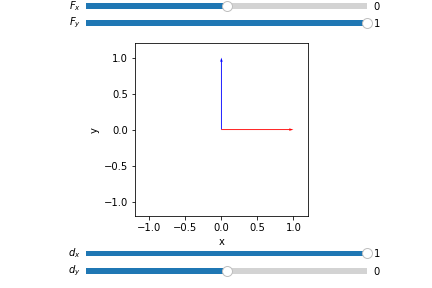

In [41]:
%matplotlib widget

fx, fy, dx, dy = sy.symbols("F_x F_y d_x d_y")

fig1, ax1 = plt.subplots(ncols=1, num=" ")

# Adjust plot layout to make room for sliders
# Sliders for F vector on top 
# and sliders for d vector on the bottom of the plot
plt.subplots_adjust(top=0.85, bottom = 0.25)

# Disable tight layout (or sliders will show inside the plot)
fig1.set_tight_layout(False)

# set initial values
f_x0 = 0
f_y0 = 1

d_x0 = 1
d_y0 = 0

# Create sliders

# Sliders for F vector
F_x_slider = mpl_widgets.Slider(
    ax=plt.axes([0.2, 0.96, 0.65, 0.04]),
    label=f"${sy.latex(fx)}$",
    valmin=-1,
    valmax=1,
    valinit=f_x0,
)

F_y_slider = mpl_widgets.Slider(
    ax=plt.axes([0.2, 0.90, 0.65, 0.04]),
    label=f"${sy.latex(fy)}$",
    valmin=-1,
    valmax=1,
    valinit=f_y0,
)

# Sliders for d vector
d_x_slider = mpl_widgets.Slider(
    ax=plt.axes([0.2, 0.1, 0.65, 0.04]),
    label=f"${sy.latex(dx)}$",
    valmin=-1,
    valmax=1,
    valinit=d_x0,
)

d_y_slider = mpl_widgets.Slider(
    ax=plt.axes([0.2, 0.04, 0.65, 0.04]),
    label=f"${sy.latex(dy)}$",
    valmin=-1,
    valmax=1,
    valinit=d_y0,
)

# Define a funtion for updating the plot when a slider changes
def update_plot(val=None):
    # Get values from sliders
    F_x = F_x_slider.val
    F_y = F_y_slider.val
    d_x = d_x_slider.val
    d_y = d_y_slider.val
    # Calculate the dot product of the two vectors
    c = np.dot([F_x, F_y], [d_x, d_y])
    
    # Plot the updated vectors (F red, d blue)
    ax1.clear()
    ax1.quiver(0, 0, F_x, F_y, angles='xy',scale_units='xy',
             scale=1, color='b', zorder=10, width=0.005)
    ax1.quiver(0, 0, d_x, d_y, angles='xy',scale_units='xy',
             scale=1, color='r', zorder=10, width=0.005)
    # Plot the dot product as a projection on d vector
    ax1.plot([0, c*d_x], [0, c*d_y], 'k', linewidth=5)
    
    
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')

    ax1.set_xlim(-1.2, 1.2)
    ax1.set_ylim(-1.2, 1.2)
    
    ax1.set_aspect('equal', 'box')
    ax1.set_facecolor("white")
    
    # Update the plot
    fig1.canvas.draw_idle()


# Callbacks for sliders interaction
F_x_slider.on_changed(update_plot)
F_y_slider.on_changed(update_plot)
d_x_slider.on_changed(update_plot)
d_y_slider.on_changed(update_plot)

# Display the plot
update_plot()
plt.show()

## Cross product, vector product, outer product

<h3><center><em><strong>Geometric definition</strong></em></center></h3>


* Example moment:

<br>

$$ \mathbf{M} =  \pmb{a} \times \mathbf{F} = a F \sin{\phi} \hat{\mathbf{e}}_M$$

<br>

* Properties $\mathbf{v} \times \mathbf{w}$ 

  * vector,
  
  * magnitude = area of parallellogram spanned by $\mathbf{v}, \mathbf{w}$
  
  * direction is that of plane normal (right-hand rule),
  
  * = 0 if $\mathbf{v}$ and $\mathbf{w}$ are parallel
  
  * $\mathbf{v} \times \mathbf{w}$  = - $\mathbf{w} \times \mathbf{v}$ 

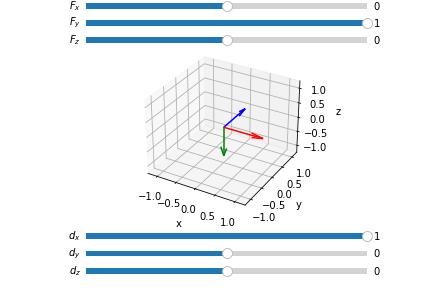

In [47]:
%matplotlib widget

fx, fy, fz, dx, dy, dz = sy.symbols("F_x F_y F_z d_x d_y d_z")


fig1, ax1 = plt.subplots(ncols=1, subplot_kw={"projection": "3d"}, num=" ")

# Adjust plot layout to make room for sliders
# Sliders for F vector on top 
# and sliders for d vector on the bottom of the plot
plt.subplots_adjust(top=0.85, bottom = 0.25)

# Disable tight layout (or sliders will show inside the plot)
fig1.set_tight_layout(False)

# set initial values
f_x0 = 0
f_y0 = 1
f_z0 = 0

d_x0 = 1
d_y0 = 0
d_z0 = 0

# Create sliders

# Sliders for F vector
F_x_slider = mpl_widgets.Slider(
    ax=plt.axes([0.2, 0.96, 0.65, 0.04]),
    label=f"${sy.latex(fx)}$",
    valmin=-1,
    valmax=1,
    valinit=f_x0,
)

F_y_slider = mpl_widgets.Slider(
    ax=plt.axes([0.2, 0.90, 0.65, 0.04]),
    label=f"${sy.latex(fy)}$",
    valmin=-1,
    valmax=1,
    valinit=f_y0,
)

F_z_slider = mpl_widgets.Slider(
    ax=plt.axes([0.2, 0.84, 0.65, 0.04]),
    label=f"${sy.latex(fz)}$",
    valmin=-1,
    valmax=1,
    valinit=f_z0,
)

# Sliders for d vector
d_x_slider = mpl_widgets.Slider(
    ax=plt.axes([0.2, 0.16, 0.65, 0.04]),
    label=f"${sy.latex(dx)}$",
    valmin=-1,
    valmax=1,
    valinit=d_x0,
)

d_y_slider = mpl_widgets.Slider(
    ax=plt.axes([0.2, 0.1, 0.65, 0.04]),
    label=f"${sy.latex(dy)}$",
    valmin=-1,
    valmax=1,
    valinit=d_y0,
)

d_z_slider = mpl_widgets.Slider(
    ax=plt.axes([0.2, 0.04, 0.65, 0.04]),
    label=f"${sy.latex(dz)}$",
    valmin=-1,
    valmax=1,
    valinit=d_z0,
)

# Define a function for updating the plot when a slider changes
def update_plot(val=None):
    # Get values from sliders
    F_x = F_x_slider.val
    F_y = F_y_slider.val
    F_z = F_z_slider.val
    d_x = d_x_slider.val
    d_y = d_y_slider.val
    d_z = d_z_slider.val
    # Calculate the cross product of the two vectors
    c = np.cross([F_x, F_y, F_z], [d_x, d_y, d_z])
    
    # Plot the updated vectors (F red, d blue)
    ax1.clear()
    ax1.quiver(0, 0, 0, F_x, F_y, F_z, color='b')
    ax1.quiver(0, 0, 0, d_x, d_y, d_z, color='r')
    # Plot the cross product (green)
    ax1.quiver(0, 0, 0, c[0], c[1], c[2], color='g')
    
    
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_zlabel('z')

    ax1.set_xlim(-1.2, 1.2)
    ax1.set_ylim(-1.2, 1.2)
    ax1.set_zlim(-1.2, 1.2)
    
    ax1.set_facecolor("white")
    
    # Update the plot
    fig1.canvas.draw_idle()


# Callbacks for sliders interaction
F_x_slider.on_changed(update_plot)
F_y_slider.on_changed(update_plot)
F_z_slider.on_changed(update_plot)
d_x_slider.on_changed(update_plot)
d_y_slider.on_changed(update_plot)
d_z_slider.on_changed(update_plot)

# Display the plot
update_plot()
plt.show()

### Products of vectors


<h3><center>Algebraic, in rectangular Cartesian coordinates:</center></h3>


<h3><center><strong>in 2D</strong></center></h3>


$$ \mathbf{v} \cdot \mathbf{w} = v_1 w_1 + v_2 w_2 \qquad \qquad \mathbf{v} \times \mathbf{w} = (v_1 w_1 - v_2 w_2) \hat{\mathbf{e}}_3 $$



<h3><center><strong>in 3D</strong></center></h3>


$$ \mathbf{v} \cdot \mathbf{w} = v_1 w_1 + v_2 w_2 + v_3 w_3 \qquad \qquad \mathbf{v} \times \mathbf{w} = 
\begin{pmatrix}
v_2 w_3 - v_3w_2 \\
v_3 w_1 - v_1 w_3 \\
v_1 w_2 - v_2 w_1
\end{pmatrix}
$$

## Rectangular Cartesian Coordinate System

<br>

Orthonormal basis – Basis vectors are:
<br>
  * orthogonal
  
  $$ \hat{\mathbf{e}}_i \cdot \hat{\mathbf{e}}_j = 0 $$
  
  * and unit length
  
  $$ \hat{\mathbf{e}}_i \cdot \hat{\mathbf{e}}_i = |\hat{\mathbf{e}}_i|^2 = 1 $$
  
  <br>
  
  <img src="figures/Cartesian_basis.png" style="width: 400px">
  
  <center>Cartesian – basis vectors with constant length and direction</center>
  <br>
  <center>In following, we will assume Cartesian orthonormal bases</center>
  

### Other orthonormal bases, e.g. polar or spherical, not discussed here

<img src="figures/Other_basis.png" style="width: 800px">

### Equivalence Cartesian geometric and algebraic dot product

<br>

$$ \pmb{a} = \sum_i a_i \hat{\mathbf{e}}_i \qquad \qquad \pmb{b} = \sum_i b_i \hat{\mathbf{e}}_i $$

<br>

$$ \pmb{a} \cdot \hat{\mathbf{e}}_i = |\pmb{a}||\hat{\mathbf{e}}_i| \cos{\theta_i} = |\pmb{a}|\cos{\theta_i} = a_i  $$

<br>

$$ \pmb{a} \cdot \pmb{b} = \pmb{a} \cdot \sum_i b_i \hat{\mathbf{e}}_i = \sum_i b_i (\pmb{a} \cdot \hat{\mathbf{e}}_i) = \sum_i b_i a_i = \sum_i a_i b_i $$

### Cartesian algebraic cross product

<br>

$$ \hat{\mathbf{e}}_i \times \hat{\mathbf{e}}_i = 0 $$

<br>

$$ \hat{\mathbf{e}}_1 \times \hat{\mathbf{e}}_2 = \hat{\mathbf{e}}_3 \qquad \qquad \hat{\mathbf{e}}_2 \times \hat{\mathbf{e}}_1 = - \hat{\mathbf{e}}_3 $$
$$ \hat{\mathbf{e}}_2 \times \hat{\mathbf{e}}_3 = \hat{\mathbf{e}}_1 \qquad \qquad \hat{\mathbf{e}}_3 \times \hat{\mathbf{e}}_2 = - \hat{\mathbf{e}}_1 $$
$$ \hat{\mathbf{e}}_3 \times \hat{\mathbf{e}}_1 = \hat{\mathbf{e}}_2 \qquad \qquad \hat{\mathbf{e}}_1 \times \hat{\mathbf{e}}_3 = - \hat{\mathbf{e}}_2 $$


In 2D:

$$ \begin{align}
\pmb{a} \times \pmb{b} &= (a_1 \hat{\mathbf{e}}_1 + a_2 \hat{\mathbf{e}}_2) \times (b_1 \hat{\mathbf{e}}_1 + b_2 \hat{\mathbf{e}}_2) \\
 &= a_1 b_1 (\hat{\mathbf{e}}_1 \times \hat{\mathbf{e}}_1) + a_1 b_2 (\hat{\mathbf{e}}_1 \times \hat{\mathbf{e}}_2) + a_2 b_1 (\hat{\mathbf{e}}_2 \times \hat{\mathbf{e}}_1) + a_2 b_2 (\hat{\mathbf{e}}_2 \times \hat{\mathbf{e}}_2) \\
 &= (a_1 b_2 - a_2 b_1) \hat{\mathbf{e}}_3
\end{align}
$$

<h3><center><strong>in 2D</strong></center></h3>


$$ \mathbf{v} \cdot \mathbf{w} = v_1 w_1 + v_2 w_2$$



<h3><center><strong>in 3D</strong></center></h3>


$$ \mathbf{v} \cdot \mathbf{w} = v_1 w_1 + v_2 w_2 + v_3 w_3 $$

### Products of vectors


<h3><center>Algebraic, in rectangular Cartesian coordinates:</center></h3>


<h3><center><strong>in 2D</strong></center></h3>


$$ \mathbf{v} \cdot \mathbf{w} = v_1 w_1 + v_2 w_2 \qquad \qquad \mathbf{v} \times \mathbf{w} = (v_1 w_1 - v_2 w_2) \hat{\mathbf{e}}_3 $$



<h3><center><strong>in 3D</strong></center></h3>


$$ \mathbf{v} \cdot \mathbf{w} = v_1 w_1 + v_2 w_2 + v_3 w_3 \qquad \qquad \mathbf{v} \times \mathbf{w} = 
\begin{pmatrix}
v_2 w_3 - v_3w_2 \\
v_3 w_1 - v_1 w_3 \\
v_1 w_2 - v_2 w_1
\end{pmatrix}
$$

### Triple products

<br>

* $\pmb{a} (\pmb{b} \cdot \pmb{c}) $ - vector times scalar

<br>

* scalar triple product  $\pmb{a} (\pmb{b} \times \pmb{c}) $

$$
\begin{align}
\pmb{a} (\pmb{b} \times \pmb{c}) &= (\pmb{a} \times \pmb{b}) \cdot \pmb{c} \\
 &= \pmb{c} \cdot (\pmb{a} \times \pmb{b}) = \pmb{b} \cdot (\pmb{c} \times \pmb{a}) \quad \text{(with cyclical permutation)} \\
 &= - \pmb{a} \cdot (\pmb{c} \times \pmb{b}) = -\pmb{c} \cdot (\pmb{b} \times \pmb{a}) = - \pmb{b} \cdot (\pmb{a} \times \pmb{c}) \quad \text{(with order changed)} \\
 &= 0 \quad \text{if } \pmb{a}, \pmb{b}, \pmb{c} \text{ coplanar}
\end{align}
$$

<br>

* $\pmb{a} \times (\pmb{b} \times \pmb{c}) $ - lies in plane formed by $\pmb{b} \times \pmb{c}$; normal to $\pmb{a}$

$$
\begin{align}
\pmb{a} \times (\pmb{b} \times \pmb{c}) &\neq (\pmb{a} \times \pmb{b}) \times \pmb{c} \\
 &= (\pmb{a} \cdot \pmb{c}) \pmb{b} - (\pmb{a} \cdot \pmb{b}) \pmb{c}
\end{align}
$$

<br>

<center><span style="color:blue"><em>Exercise 8</em></span></center>

<h2><center><span style="color:red">Covered so far</span></center></h2>


* Revision of main characteristics of a vector
<br>

* Linear independence of vectors
<br>

* Vector products: dot product, cross product
<br>

* Definition Cartesian orthonormal basis

<h2><center>Please take a break</center></h2>
<h3><center><span style="color:blue">then try yourself</span></center></h3>

* If the material covered so far was all familiar, please skip to <span style="color:blue">Exercise 2</span> in the notebook
<br>

* If you would benefit from recapping vector products, please look at <span style="color:green">Exercise 1</span> first